# Activity 5: Feature Extraction Part 1 (Image Segmentation)

Mary Franczine Tan <br>
Applied Physics 157 WFY-WFX-1 <br>
Submitted March 25, 2023

In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## 5.1 Black and White Image Segmentation

To segment an image, we retrieved its color value distribution (displayed as a histogram) and determine which threshold will allow us to remove the unwanted details. In this example, we want to isolate the text (mostly in black). The goal, then, is to remove the background, which is mostly white.

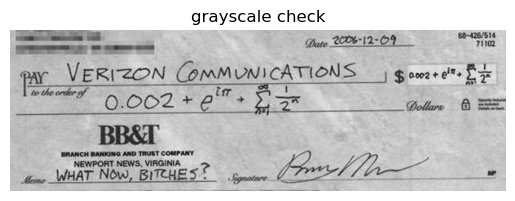

In [2]:
# import and show image

check = plt.imread('cropped_grayscale_check.jpg')
plt.title('grayscale check')
plt.axis('off')
plt.imshow(check, cmap='gray')

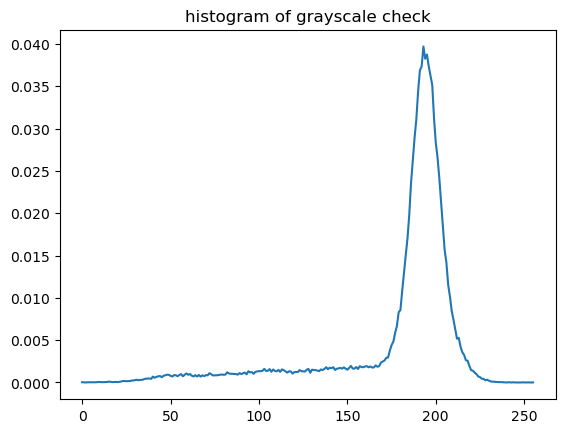

In [3]:
# get histogram

hist, bins = np.histogram(check, bins=256, density=True)
plt.title('histogram of grayscale check')
plt.plot(hist)

In [4]:
# function to conduct segmentation using thresholding

def threshold_check(threshold):
    check_threshold = np.copy(check)
    check_threshold[np.where(check_threshold  > threshold)] = 0

    return check_threshold

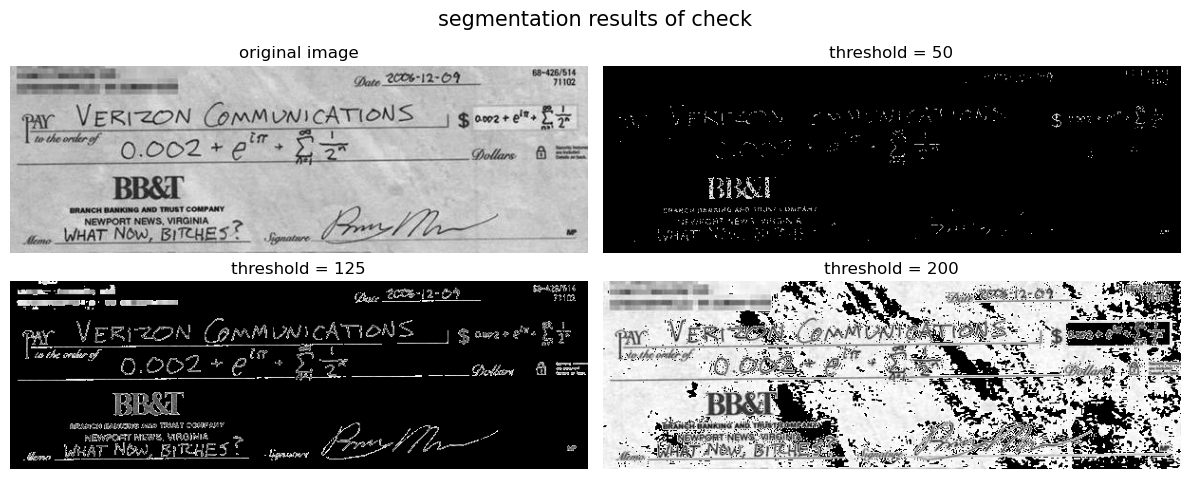

In [5]:
# segmentaiton using different thresholds

check_50 = threshold_check(50)
check_125 = threshold_check(125)
check_200 = threshold_check(200)

fig, ax = plt.subplots(2, 2, figsize=(12,5))

ax[0][0].imshow(check, cmap='gray')
ax[0][0].set_title('original image')
ax[0][1].imshow(check_50, cmap='gray')
ax[0][1].set_title('threshold = 50')
ax[1][0].imshow(check_125, cmap='gray')
ax[1][0].set_title('threshold = 125')
ax[1][1].imshow(check_200, cmap='gray')
ax[1][1].set_title('threshold = 200')

for i in range(2):
    for j in range(2):
        ax[i][j].axis('off')
        
plt.suptitle('segmentation results of check', size = 15)
plt.tight_layout()
    

## 5.2 Parametric Segmentation of Colored Image

In the case of an rgb image, the process of segmentation is still the same. To get a properly segmented image, the image must be separated into its rgb components. Each component undergoes segmentation with its own thresholding.

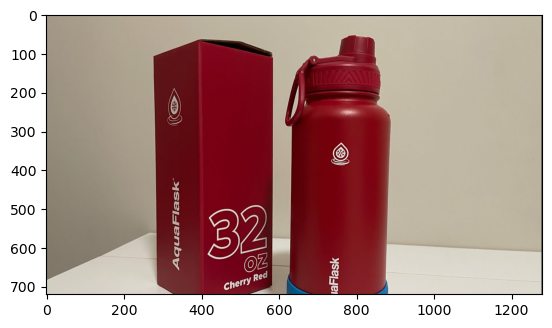

In [6]:
flask_original = plt.imread('maxresdefault.jpg')
plt.imshow(flask_original)

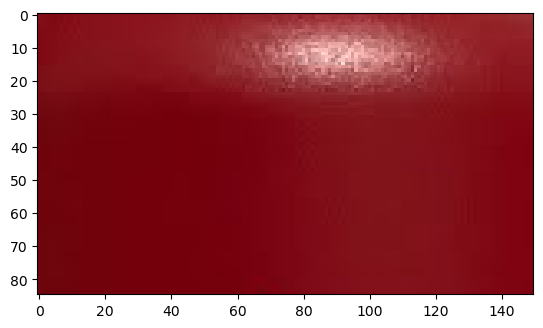

In [7]:
ROI = flask_original[240:325, 690:840]
plt.imshow(ROI)

### 5.2.1 Without separating RGB components

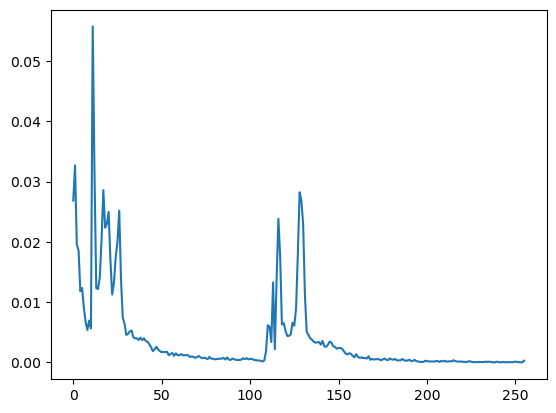

In [8]:
# get histogram 
hist, bins = np.histogram(ROI, bins=256, density=True)
plt.plot(hist)

Text(0.5, 1.0, 'segmentation without separating RGB components')

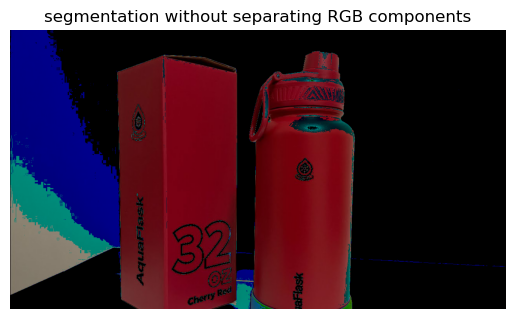

In [9]:
flask_segmented = np.copy(flask_original)
flask_segmented[np.where(flask_segmented  > 140)] = 0
plt.imshow(flask_segmented)
plt.axis('off')
plt.title('segmentation without separating RGB components')

As we can see, the image is not properly segmented because all rgb layers used the same threshold

### 5.2.2 Separating RGB components

In [10]:
# separating rgb layers

ROI_r = ROI[:,:,0] /ROI.sum(axis=2) # get r
ROI_g = ROI[:,:,1] /ROI.sum(axis=2) # get g

one_matrix = np.ones_like(float, shape = ROI_r.shape) # ceeate matrix of ones
ROI_b = one_matrix - (ROI_r + ROI_g) # get b

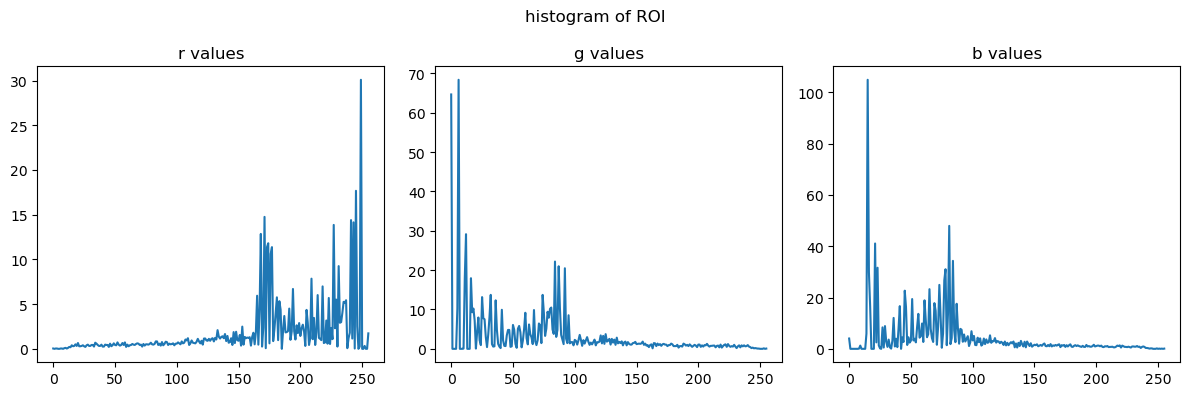

In [11]:
# getting histograms 

hist_r, bins = np.histogram(ROI_r, bins=256, density=True)
hist_g, bins = np.histogram(ROI_g, bins=256, density=True)
hist_b, bins = np.histogram(ROI_b, bins=256, density=True)

fig, ax = plt.subplots(1, 3, figsize = (12, 4))

ax[0].plot(hist_r)
ax[0].set_title('r values')
ax[1].plot(hist_g)
ax[1].set_title('g values')
ax[2].plot(hist_b)
ax[2].set_title('b values')

plt.suptitle('histogram of ROI')
plt.tight_layout()

In [12]:
# segmentation

flask_segmented = np.copy(flask_original)

flask_segmented_r = flask_segmented[...,0]
flask_segmented_r[np.where(flask_segmented_r  > 150)] = 0

flask_segmented_g = flask_segmented[...,1]
flask_segmented_g[np.where(flask_segmented_g  > 10)] = 0

flask_segmented_b = flask_segmented[...,2]
flask_segmented_b[np.where(flask_segmented_b  > 50)] = 0

flask_segmented[...,0] = flask_segmented_r
flask_segmented[...,1] = flask_segmented_g
flask_segmented[...,2] = flask_segmented_b

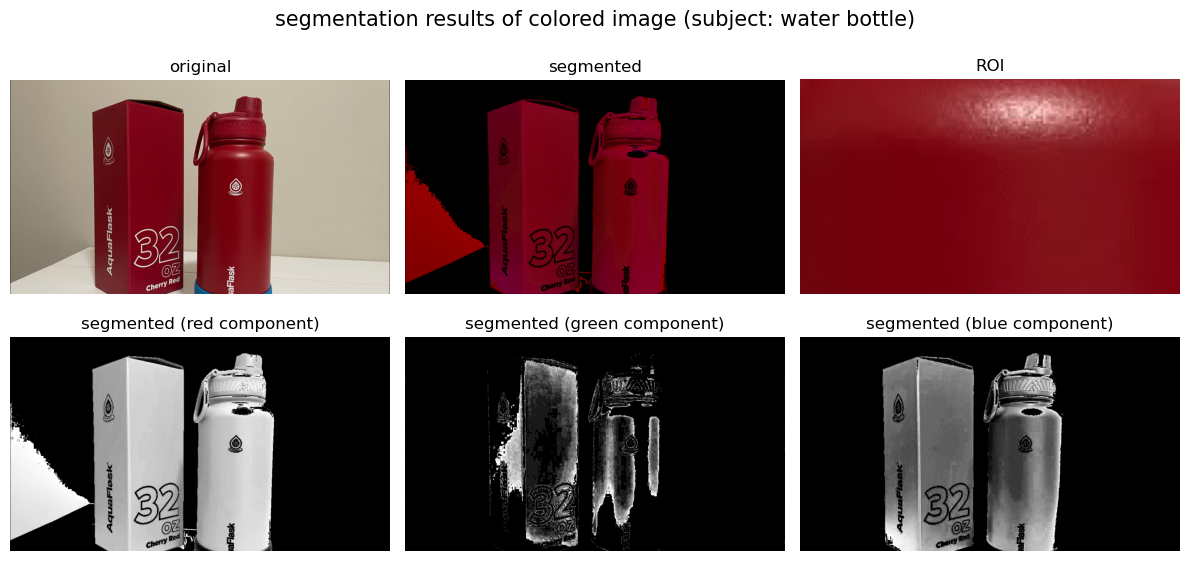

In [13]:
# display results

fig, ax = plt.subplots(2, 3, figsize = (12, 6))

ax[0][0].imshow(flask_original)
ax[0][0].set_title('original')
ax[0][1].imshow(flask_segmented)
ax[0][1].set_title('segmented')
ax[0][2].imshow(ROI)
ax[0][2].set_title('ROI')
ax[1][0].imshow(flask_segmented_r, cmap = 'gray')
ax[1][0].set_title('segmented (red component)')
ax[1][1].imshow(flask_segmented_g, cmap = 'gray')
ax[1][1].set_title('segmented (green component)')
ax[1][2].imshow(flask_segmented_b, cmap = 'gray')
ax[1][2].set_title('segmented (blue component)')

for i in range(2):
    for j in range(3):
        ax[i][j].axis('off')
        
plt.suptitle('segmentation results of colored image (subject: water bottle)', size = 15)
plt.tight_layout()
    

### Non-parametric segmentation

The advantage of non-parametric segmentation is that we will no longer need to identify a threshold value. Instead, we retrieve the histogram of the region of interest and use backprojection to segment the original image. The advantage of this process is that it can be automated.

Text(0.5, 1.0, 'histogram of ROI')

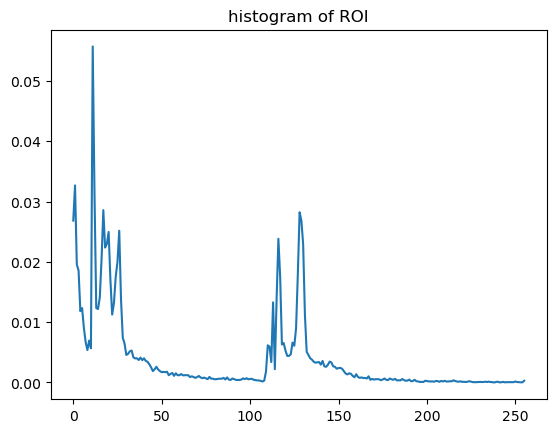

In [14]:
# getting histogram of ROI

hist_ROI, bins = np.histogram(ROI, bins=256, density=True)

plt.plot(hist_ROI)
plt.title('histogram of ROI')

In [15]:
from matplotlib import colors

def RG_Chroma_plotter(red, green, title):
    p_color = [(r, g, 1-r-g) for r,g in 
               zip(red.flatten(),green.flatten())]
    norm = colors.Normalize(vmin=0,vmax=1.)
    norm.autoscale(p_color)
    p_color = norm(p_color).tolist()
    fig = plt.figure(figsize=(7, 6.5), dpi=100)
    ax = fig.add_subplot(111)
    ax.scatter(red.flatten(), 
                green.flatten(), 
                c = p_color, alpha = 0.40)
    ax.set_xlabel('Red Channel')
    ax.set_ylabel('Green Channel')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    
    plt.title('chromaticity diagram of ' + title, size = 15)
    plt.show()

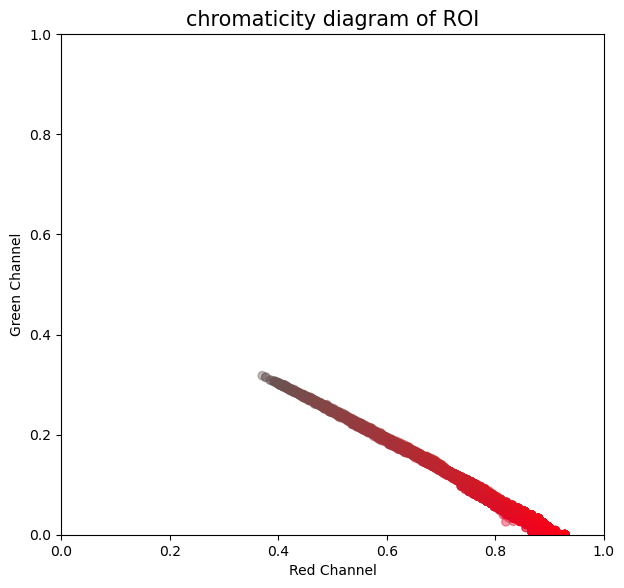

In [16]:
# plotting chromaticity diagram of ROI
RG_Chroma_plotter(ROI_r, ROI_g, 'ROI')

In [17]:
# function that conducts non-parametric segmentation

import cv2 as cv

def npSegment(roi, target):
    
    assert roi is not None, "file could not be read, check with os.path.exists()"
    hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
    
    assert target is not None, "file could not be read, check with os.path.exists()"
    hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)

    # calculating object histogram
    roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

    # normalize histogram and apply backprojection
    cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)
    dst = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

    # Now convolute with circular disc
    disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
    cv.filter2D(dst,-1,disc,dst)

    # threshold and binary AND
    ret,thresh = cv.threshold(dst,50,255,0)
    thresh = cv.merge((thresh,thresh,thresh))
    res = cv.bitwise_and(target,thresh)
    
    return thresh, res

In [18]:
# conduct non-parametric segmentation (trial 1)

roi = np.copy(ROI)
target = np.copy(flask_original)

flaskThresh1, flaskRes1 = npSegment(roi, target)

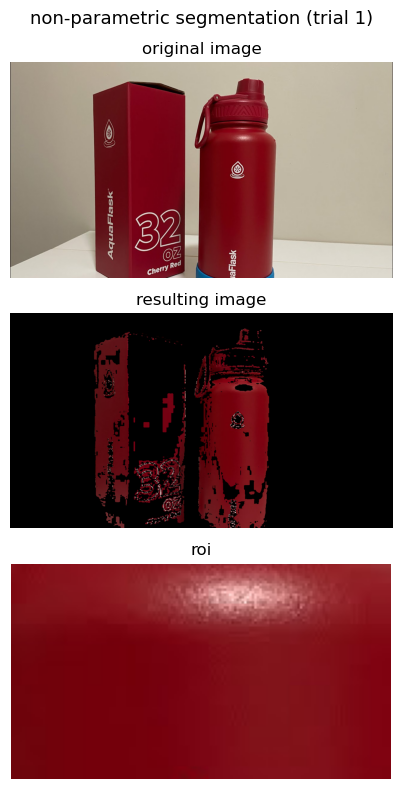

In [19]:
# show results
fig, ax = plt.subplots(3, figsize = (6, 8))

ax[0].imshow(flask_original)
ax[0].axis('off')
ax[0].set_title('original image')
ax[1].imshow(flaskRes1)
ax[1].axis('off')
ax[1].set_title('resulting image')
ax[2].imshow(roi)
ax[2].axis('off')
ax[2].set_title('roi')

plt.suptitle('non-parametric segmentation (trial 1)', size =13)
plt.tight_layout()

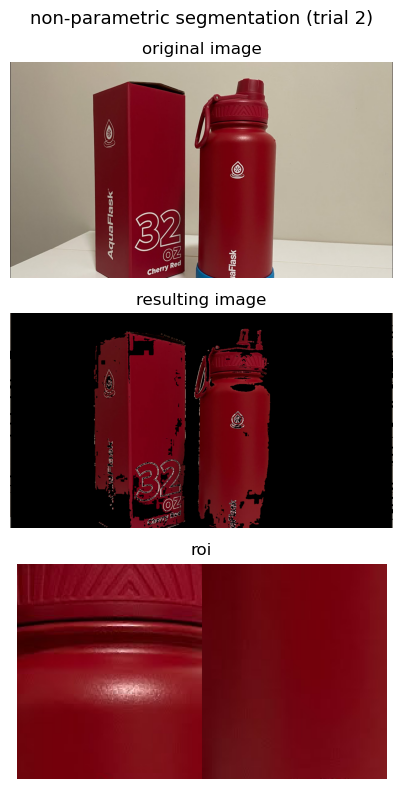

In [20]:
# conduct non-parametric segmentation (trial 2)

roi2 = np.hstack((flask_original[150:325, 690:840], flask_original[450:625, 640:790]))
flaskThresh2, flaskRes2 = npSegment(roi2, target)

fig, ax = plt.subplots(3, figsize = (6, 8))

ax[0].imshow(flask_original)
ax[0].axis('off')
ax[0].set_title('original image')
ax[1].imshow(flaskRes2)
ax[1].axis('off')
ax[1].set_title('resulting image')
ax[2].imshow(roi2)
ax[2].axis('off')
ax[2].set_title('roi')


plt.suptitle('non-parametric segmentation (trial 2)', size =13)
plt.tight_layout()

Sources:

- Edeza, Tonichi. (2021, Jan 31). Image Processing with Python — Using RG Chromaticity. Retrieved from this [link](https://towardsdatascience.com/image-processing-with-python-using-rg-chromaticity-c585e7905818)
- Histogram Backprojection from the OpenCV2 documentation [page](https://docs.opencv.org/3.4/dc/df6/tutorial_py_histogram_backprojection.html)


## Bonus: Tree Cover and Vegetation Detection 

In [21]:
# read images

path = 'pshscvc/'

cvc2010 = plt.imread(path+'cvc2010.jpg')
cvc2014 = plt.imread(path+'cvc2014.jpg')
cvc2016 = plt.imread(path+'cvc2016.jpg')
cvc2018 = plt.imread(path+'cvc2018.jpg')
cvc2020 = plt.imread(path+'cvc2020.jpg')
cvc2021 = plt.imread(path+'cvc2021.jpg')

In [22]:
# select ROI
roi2010 = cvc2010[400:800, 0:400]

In [23]:
# use non-parametric segmentation
cvc2010_m, cvc2010_s = npSegment(roi2010, cvc2010)

In [24]:
# function for conducting segmentation and showing results

from matplotlib.colors import ListedColormap

cmap = ListedColormap(['red', 'green'])

def plotVegetation(orig, roi, year):
    
    mask, result = npSegment(roi, orig)
    
    flat_mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)
    
    fig, ax = plt.subplots(1, 2, figsize = (9, 3.25))
    
    ax[0].imshow(orig)
    ax[0].set_title('satellite image')
    ax[0].axis('off')
    ax[1].imshow(flat_mask, cmap = 'Greens')
    ax[1].set_title('vegetation area')
    ax[1].axis('off')
    
    plt.suptitle('Vegetation around PSHS-CVC in ' + year, size = 14)
    plt.tight_layout()

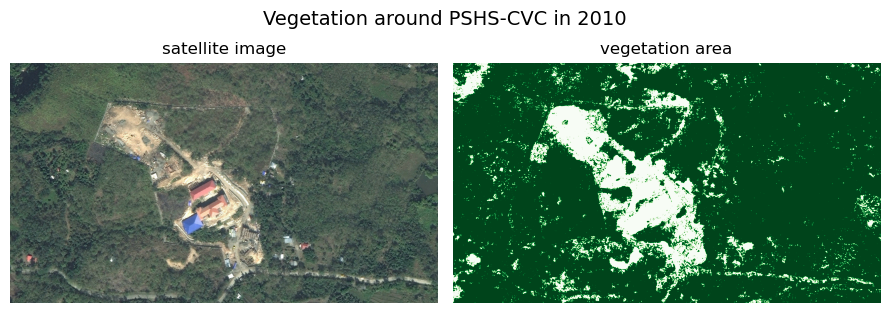

In [25]:
plotVegetation(cvc2010, roi2010, '2010')

Here, we see that the non-parametric segmentation has successfully detected the areas of vegetation in the satellite image

In [26]:
# choose ROI for 2014
roi2014 = cvc2014[400:800, 3400:3800]

In this trial, the segmentation has failed to detect some of the vegetation in the lower half of the image. From a visual analysis, we can attribute this to the fact that the color of the vegetation in that area is not included in the ROI, and that they are also more vibrant. 

To remedy this, I isolate two ROIs from the image and use `np.vstack` to combine them into one image and use this ROI in the segmentation.

In [27]:
# choose ROI for 2014
roi2014_1 = cvc2014[1900:2050, 1300:1700]

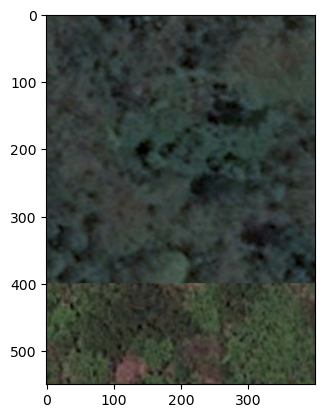

In [28]:
stackedROI = np.vstack((roi2014, roi2014_1))
plt.imshow(stackedROI)

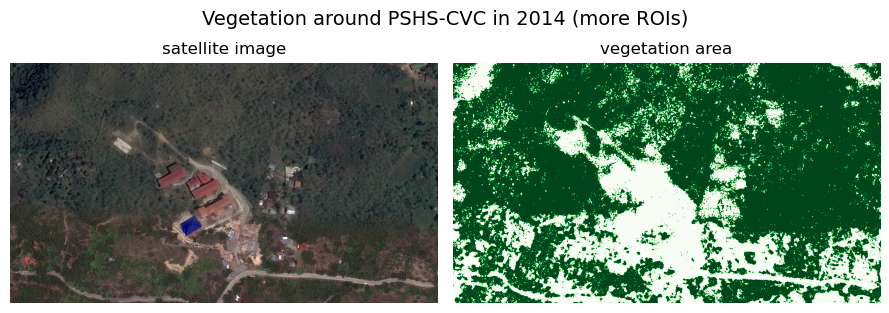

In [29]:
# apply segmentation and show results
plotVegetation(cvc2014, stackedROI, '2014 (more ROIs)')

We see that this method is better at detecting vegetation. This method will be used in all the sattelite images to improve vegetation detection.

In [30]:
def detectVegetation(image, roi):

    mask, result= npSegment(roi, image)
    flat_mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY) 
    
    return flat_mask

In [31]:
# new method on 2010 satellite image

roi2010_1 = np.copy(roi2010)
roi2010_2 = cvc2010[200:600, 0:400]

# stacked roi
sroi2010 = np.hstack((roi2010_1, roi2010_2))

# segmentation
res2010 = detectVegetation(cvc2010, sroi2010)

In [32]:
# new method on 2014 satellite image

roi2014_1 = np.copy(stackedROI)
roi2014_2 = cvc2010[0:550, 0:400]
roi2014_3 = cvc2010[1000:1550, 3200:3600]

# stacked roi
sroi2014 = np.hstack((roi2014_1, roi2014_2, roi2014_3))

# segmentation
res2014 = detectVegetation(cvc2014, sroi2014)

In [33]:
# new method on 2016 satellite image

roi2016_1 = cvc2016[100:600, 3000:3500]
roi2016_2 = cvc2016[100:600, 1600:2100]

# stacked roi
sroi2016 = np.hstack((roi2016_1, roi2016_2))

# segmentation
res2016 = detectVegetation(cvc2016, sroi2016)

In [34]:
# new method on 2018 satellite image

roi2018_1 = cvc2018[100:500, 3000:3500]
roi2018_2 = cvc2018[1000:1400, 0:500]

# stacked roi
sroi2018 = np.hstack((roi2018_1, roi2018_2))

# segmentation
res2018 = detectVegetation(cvc2018, sroi2018)

In [35]:
# new method on 2020 satellite image

roi2020_1 = cvc2020[100:500, 3000:3500]
roi2020_2 = cvc2020[1000:1400, 600:1000]

# stacked roi
sroi2020 = np.hstack((roi2020_1, roi2020_2))

# segmentation
res2020 = detectVegetation(cvc2020, sroi2020)

In [36]:
# new method on 2021 satellite image

roi2021_1 = cvc2021[100:500, 3000:3500]
roi2021_2 = cvc2021[1000:1400, 600:1000]

# stacked roi
sroi2021 = np.hstack((roi2021_1, roi2021_2))

# segmentation
res2021 = detectVegetation(cvc2021, sroi2021)

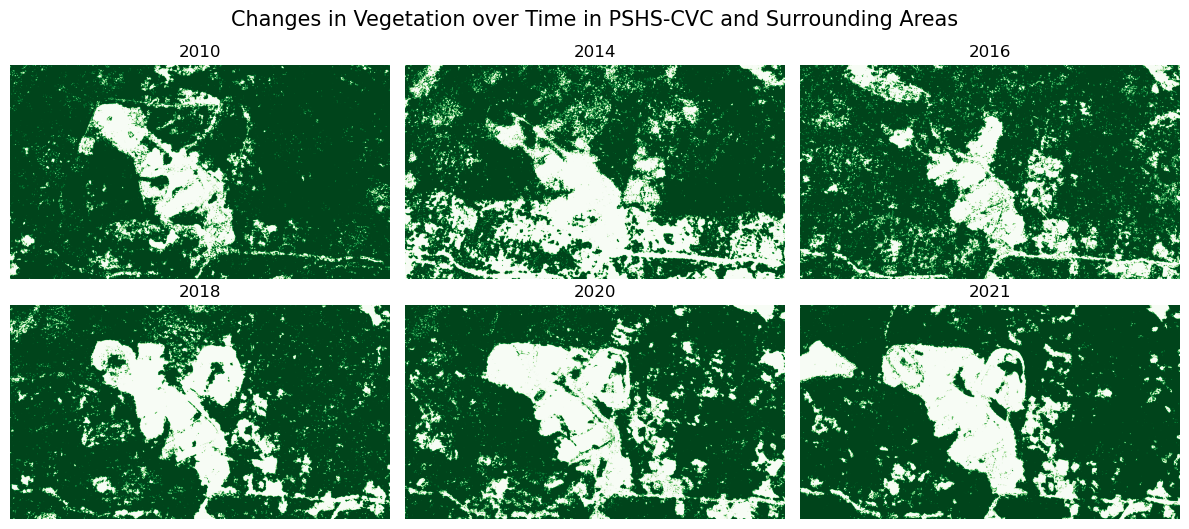

In [37]:
# plot vegetation over the years

fig, ax = plt.subplots(2, 3, figsize = (12, 5.5))

ax[0][0].imshow(res2010, cmap = 'Greens')
ax[0][0].set_title('2010')
ax[0][0].axis('off')
ax[0][1].imshow(res2014, cmap = 'Greens')
ax[0][1].set_title('2014')
ax[0][1].axis('off')
ax[0][2].imshow(res2016, cmap = 'Greens')
ax[0][2].set_title('2016')
ax[0][2].axis('off')
ax[1][0].imshow(res2018, cmap = 'Greens')
ax[1][0].set_title('2018')
ax[1][0].axis('off')
ax[1][1].imshow(res2020, cmap = 'Greens')
ax[1][1].set_title('2020')
ax[1][1].axis('off')
ax[1][2].imshow(res2021, cmap = 'Greens')
ax[1][2].set_title('2021')
ax[1][2].axis('off')

plt.suptitle('Changes in Vegetation over Time in PSHS-CVC and Surrounding Areas', size = 15)
plt.tight_layout()

Sources:
- Google Earth Pro for stallite images